In [2]:
import matplotlib.pyplot as plt
import numpy as np

c:\Users\haekj\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


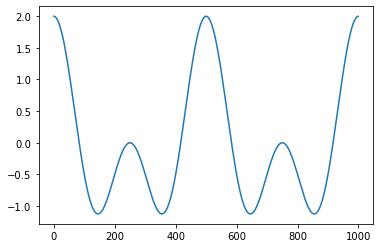

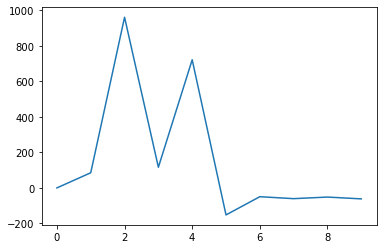

In [16]:
def createWave(duration, resolution, frequency):
    t = np.arange(0, duration, duration/resolution)
    return pow(np.e, 2 * np.pi * -1j * frequency * t)

def split(points):
    idx = 0
    p_e = []
    p_o = []
    for point in points:
        if idx % 2 == 0:
            # Even index
            p_e.append(point)
        else:
            # Odd index
            p_o.append(point)
        idx += 1
    return (p_e, p_o)


def FFT(P):
    n = len(P)
    if n == 1:
        return P
    omega = pow(np.e, (2*np.pi*1j)/n)
    pe, po = split(P)
    ye, yo = FFT(pe), FFT(po)
    y = [0] * n
    for j in range(n//2):
        y[j] = ye[j]+(pow(omega, j)*yo[j])
        y[j + n//2] = ye[j] - (pow(omega, j)*yo[j])
    return y                       

complex_wave = createWave(1, 1000, 2) + createWave(1, 1000, 4)
plt.plot(complex_wave)
plt.show()

plt.plot(FFT(complex_wave)[0:10])
plt.show()



